In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from spine_vision.io import read_medical_image, normalize_to_uint8
from spine_vision.datasets.classification import extract_middle_slice, load_localization_model, predict_ivd_locations, resample_to_isotropic
from loguru import logger

/home/nghiant/Github/spine-vision/.venv/lib/python3.11/site-packages/gdown/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
logger.remove()

In [3]:
DEVICE = "cuda"
MODEL_PATH = Path.cwd().parent / "weights/localization/regression_convnext_baseline/best_model.pt"
IMAGE_PATH = Path.cwd().parent / "data/interim/Phenikaa/images/250002076/SAG T2"

In [4]:
image = read_medical_image(IMAGE_PATH)
image = resample_to_isotropic(image, new_spacing=(0.5, 0.5, 0.5))
middle_slice = extract_middle_slice(image)

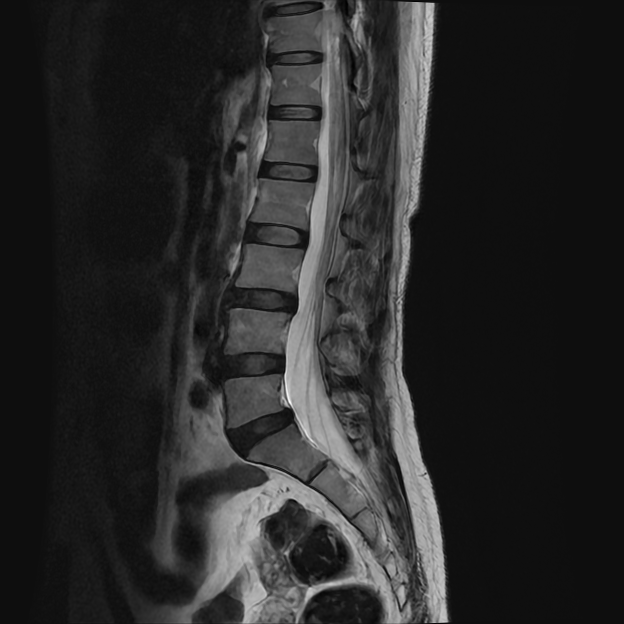

In [5]:
middle_slice_image = Image.fromarray(normalize_to_uint8(middle_slice))
display(middle_slice_image)

In [6]:
model = load_localization_model(MODEL_PATH, variant="base", device=DEVICE)
locations = predict_ivd_locations(model, middle_slice, device=DEVICE, image_size=(512, 512))

In [7]:
locations

{0: (0.5102336406707764, 0.28380247950553894),
 1: (0.49843642115592957, 0.3826958239078522),
 2: (0.47664377093315125, 0.4830980896949768),
 3: (0.46609047055244446, 0.580262303352356),
 4: (0.47730007767677307, 0.6621851921081543)}

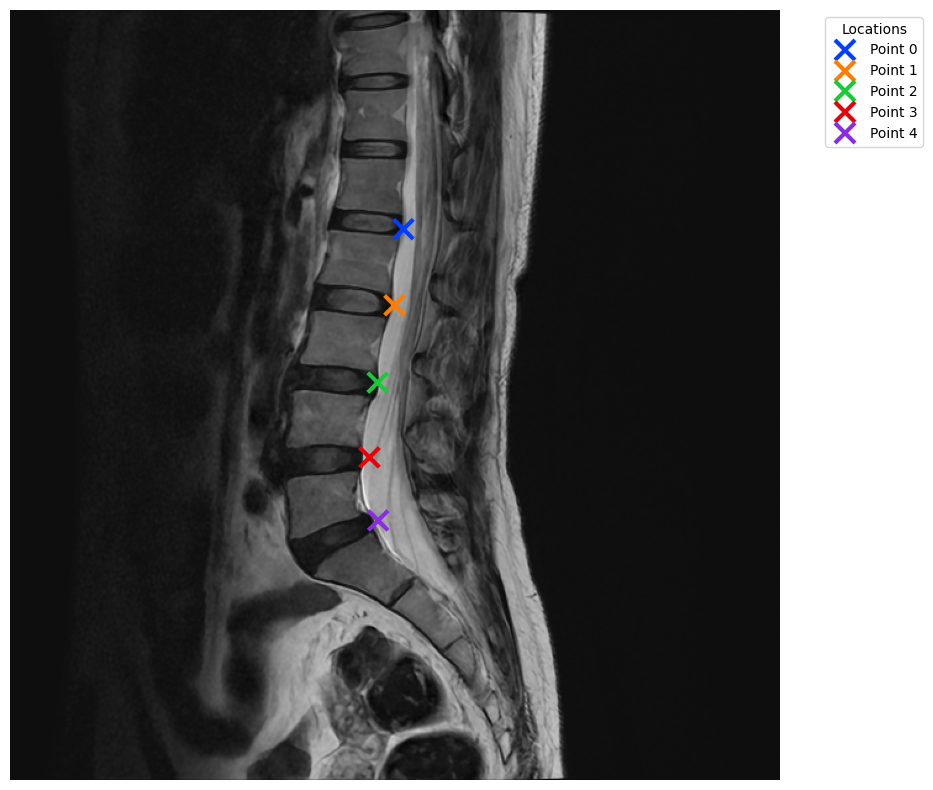

In [8]:
height, width = middle_slice_image.size

plot_data = []
for label_id, (norm_x, norm_y) in locations.items():
    plot_data.append({
        'IVD Label': f'Point {label_id}',
        'x': norm_x * width,
        'y': norm_y * height
    })

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(10, 10))

plt.imshow(middle_slice_image, cmap='gray')

sns.scatterplot(
    data=plot_df,
    x='x', 
    y='y', 
    hue='IVD Label',
    marker='x',
    s=200,
    linewidth=3,
    palette='bright'
)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Locations")
plt.axis('off')
plt.show()

In [9]:
SLICE_DIR = Path.cwd() / "output/slice"
OUTPUT_DIR = Path.cwd() / "output/localization"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

In [10]:
model = load_localization_model(MODEL_PATH, variant="base", device=DEVICE)

for image_path in sorted(SLICE_DIR.glob("*.png")):
    slice_image = Image.open(image_path).convert("L")
    slice_array = np.array(slice_image)
    
    locations = predict_ivd_locations(model, slice_array, device=DEVICE, image_size=(512, 512))
    
    height, width = slice_image.size
    plot_data = []
    for label_id, (norm_x, norm_y) in locations.items():
        plot_data.append({
            'IVD Label': f'Point {label_id}',
            'x': norm_x * width,
            'y': norm_y * height
        })
    plot_df = pd.DataFrame(plot_data)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(slice_image, cmap='gray')
    sns.scatterplot(
        data=plot_df,
        x='x', 
        y='y', 
        hue='IVD Label',
        marker='x',
        s=200,
        linewidth=3,
        palette='bright',
        ax=ax
    )
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Locations")
    ax.axis('off')
    ax.set_title(image_path.stem)
    
    output_path = OUTPUT_DIR / f"{image_path.stem}_localization.png"
    fig.savefig(output_path, bbox_inches='tight', dpi=150)
    plt.close(fig)
    print(f"Saved: {output_path.name}")

Saved: 100_t2_SagT2_localization.png
Saved: 101_t2_SagT2_localization.png
Saved: 104_t2_SagT2_localization.png
Saved: 105_t2_SagT2_localization.png
Saved: 106_t2_SagT2_localization.png
Saved: 107_t2_SagT2_localization.png
Saved: 108_t2_SagT2_localization.png
Saved: 109_t2_SagT2_localization.png
Saved: 10_t2_SagT2_localization.png
Saved: 110_t2_SagT2_localization.png
Saved: 112_t2_SagT2_localization.png
Saved: 113_t2_SagT2_localization.png
Saved: 115_t2_SagT2_localization.png
Saved: 116_t2_SagT2_localization.png
Saved: 117_t2_SagT2_localization.png
Saved: 118_t2_SagT2_localization.png
Saved: 11_t2_SagT2_localization.png
Saved: 120_t2_SagT2_localization.png
Saved: 121_t2_SagT2_localization.png
Saved: 122_t2_SagT2_localization.png
Saved: 123_t2_SagT2_localization.png
Saved: 124_t2_SagT2_localization.png
Saved: 125_t2_SagT2_localization.png
Saved: 127_t2_SagT2_localization.png
Saved: 129_t2_SagT2_localization.png
Saved: 12_t2_SagT2_localization.png
Saved: 130_t2_SagT2_localization.png
Save